## Credit Card Fraud Detection as a Classification Problem

### Business Problem
It is vital that credit card companies are able to
identify fraudulent credit card transactions so that customers
are not charged for items that they did not purchase. Such
problems can be tackled with Data Science and its importance,
along with Machine Learning, cannot be overstated. This
project intends to illustrate the modelling of a data set using
machine learning with Credit Card Fraud Detection.

### Objective
Since the fraud transactions form the minority class with only few observations and the dataset being highly imbalanced, we should see what techniques can be employed to balance the data. The sole aim of this capstone is to verify if balancing the dataset helps to build better classifiers.

In [ ]:
#Import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory data analysis

In [ ]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Karthik/CreditCardFraudDetection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The time is recorded in the number of seconds since the first transaction in the data set. Therefore, we can conclude that this data set includes all transactions recorded over the course of two days. The features was prepared using PCA and so the physical interpretation of individual features does not make sense. The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
#Read the shape
df.shape

(284807, 31)

In [ ]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Check missing values
df.isnull().sum().sum()

0

There are no missing values

In [ ]:
#Lets describe the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


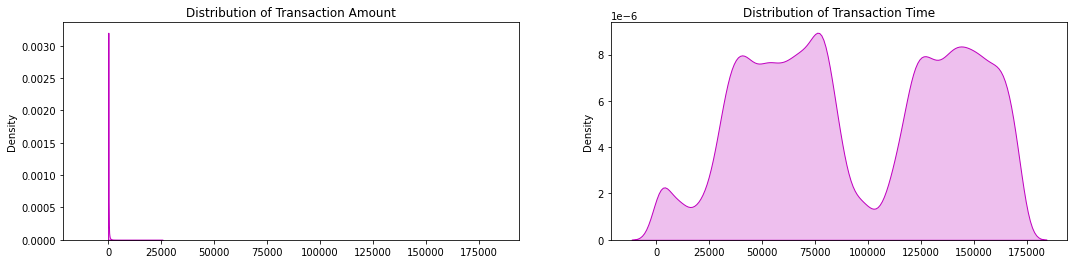

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Transaction Amount')
sns.distplot(time_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Transaction Time')

plt.show()

Looking at the distribution of the two named features in the dataset i.e. Time and Amount. For Time, it is clear that there were certain duration in the day when most of the transactions took place.

In [ ]:
#Lets look at distribution of Amount variable with respect to Class
df[df.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As we can clearly notice from the above distribution of Amount variable w.r.t. Class, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In [ ]:
#Lets create a list of labels which can be used in data visualizations. Normal indicate Class 0 which are non-fraudulent transactions. Fraud indicate class 1 which are fraudulent transactions.
LABELS = ['Normal','Fraud']

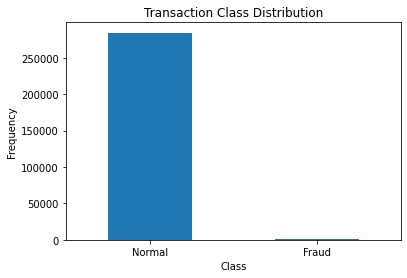

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The plot indicates that the dataset is highly imbalanced.

Also, the rest of the features (apart from Time and Amount) don't have any physical interpretation since the features are PCA transformed and will be seen through histograms.

In [ ]:
#Lets look at Time variable
df.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [ ]:
# Drop unnecessary columns.
df.drop(columns='Time', axis=1, inplace=True)

It could be that the Time variable is a misnomer here. It should have been serial no. as it does not capture the exact time the transaction was made but the time that is elapsed from offset. This can be dropped from the dataframe as it will not add any value in model building.

In [ ]:
#Lets drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [ ]:
#Lets check the dataframe
print(df.shape)
print(df.Class.value_counts())

(275663, 30)
0    275190
1       473
Name: Class, dtype: int64


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Plotting the distribution of a variable

In [ ]:
#Lets create a list of variables
var_list = list(df.columns)

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
def plot_hist(var_list):
    for var in var_list:
        if ((var not in ('Amount','Class')) and (df[var].dtype==np.float64)):
            plt.hist(df[var])
            plt.show()

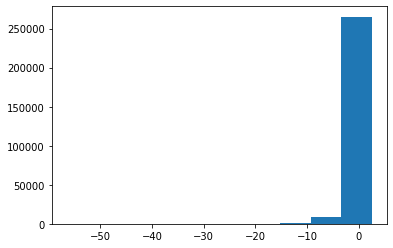

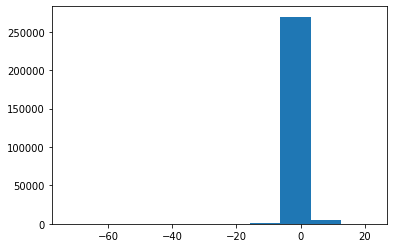

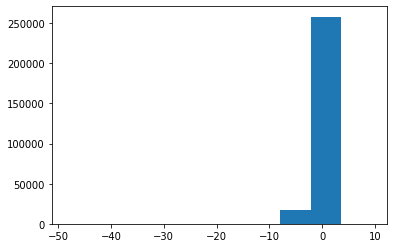

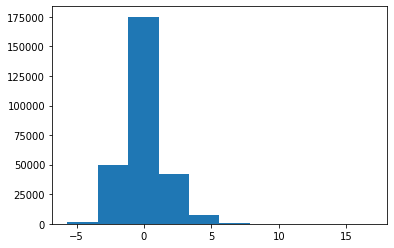

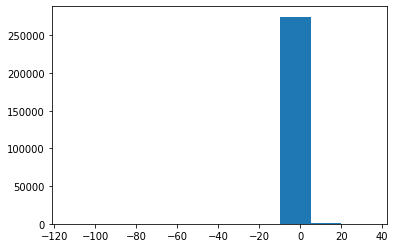

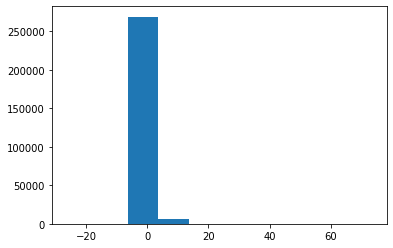

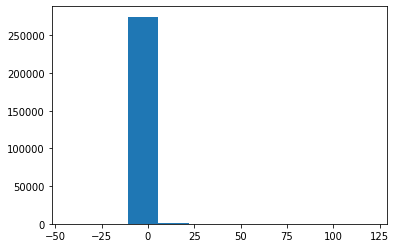

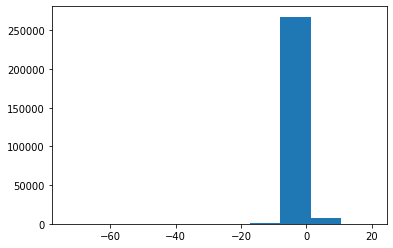

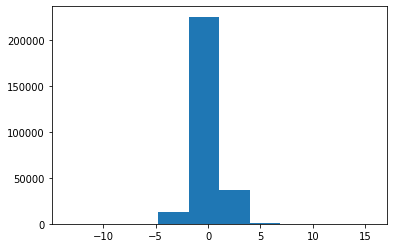

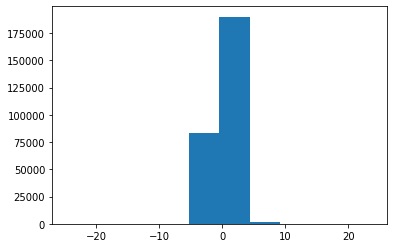

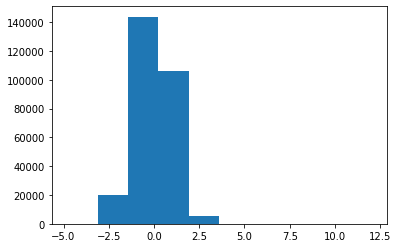

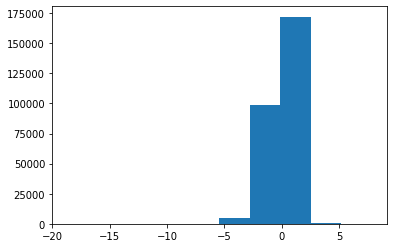

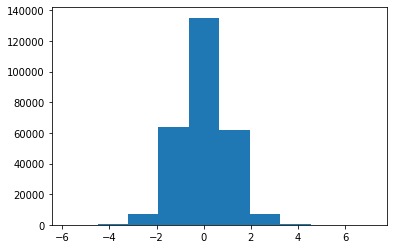

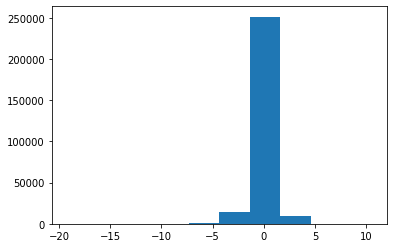

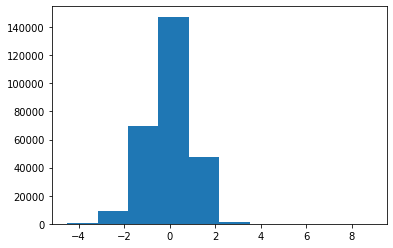

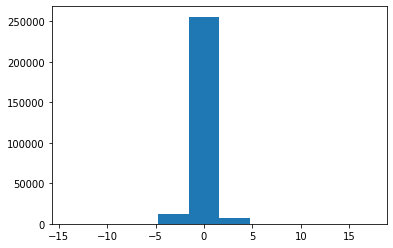

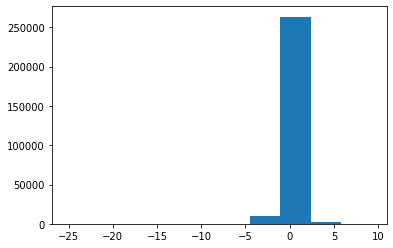

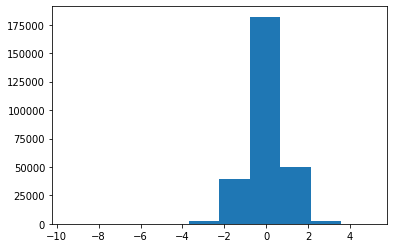

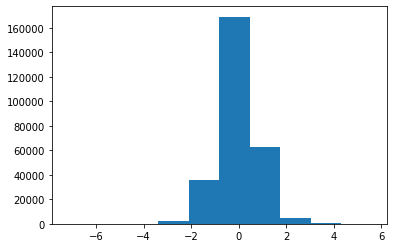

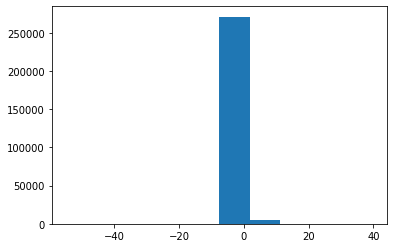

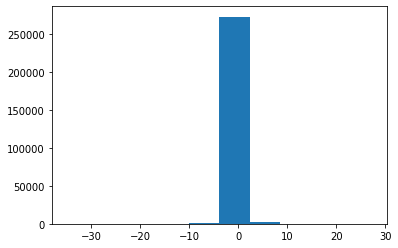

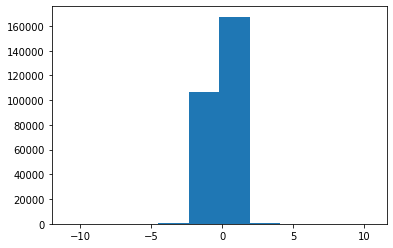

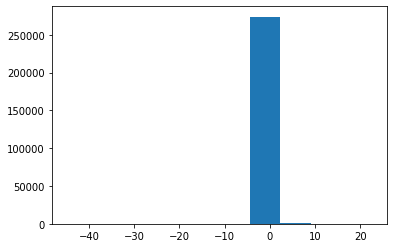

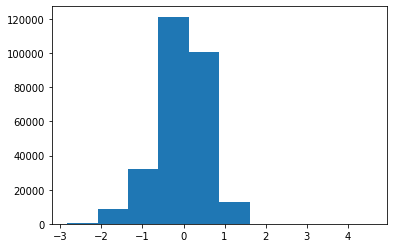

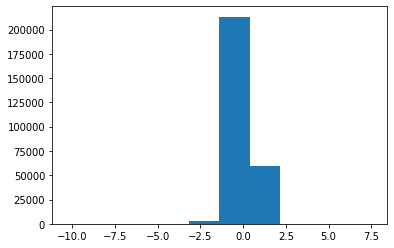

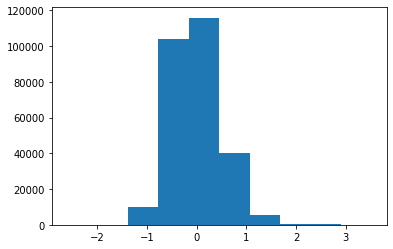

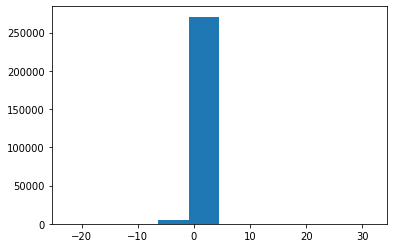

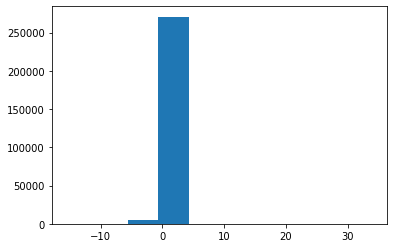

In [ ]:
plot_hist(var_list)

The histograms and their probability distributions for each of the variables seem like Gaussians. If we consider each of the original variable as random variable before PCA and we are adding those random variables together and when we do so, the resultant random variable will always look like Gaussian.

### Splitting the data into train & test data

In [ ]:
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
345
128


## Model Building
- Build different models on the imbalanced dataset and see the result

Performance Metrics for Classification:

1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. F1 score
6. AUC-ROC score

Accuracy cannot be used here since the dataset is highly imbalanced and the results are always inclined towards the majarity dataset.

Confusion Matrix, Precision, Recall and F1 score - all these metrics are dependent on threshold. If we change the threshold, then all these metrics will change and they cannot be used to measure the model performance here.

AUC-ROC score is the metric which is computed taking into account all the possible thresholds and are threshold independent. Higher the AUC-ROC score, better the classifier. Hence we will use AUC-ROC score as the metric for model performance.

Model 1: Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [ ]:
#perform hyperparameter tuning with cross validation

# Creating the hyperparameter grid
c_space = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]
params = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1200) #maximum iterations 1200 was chosen after trying out various values: 200,500,800,1000,1200

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

logreg_cv = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
logreg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1200), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3,
                               0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", logreg_cv.best_score_)
print("Best hyperparameters: ", logreg_cv.best_params_)

Best AUC:  0.9820507565022183
Best hyperparameters:  {'C': 0.001}


Note that when max_iter=1200 was chosen, the above code executed without any errors giving good ROC AUC score

In [ ]:
#Evaluate on train data
# predict on train data
y_train_pred = logreg_cv.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# check area under curve
y_train_pred_prob = logreg_cv.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))

[[206377     25]
 [   163    182]]
AUC:    	 0.98


In [ ]:
# predict on test data
y_pred = logreg_cv.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[68772    16]
 [   68    60]]
AUC:    	 0.98


In [ ]:
#Lets store the above results
result = {"Model":["Logistic Regression"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = pd.DataFrame(result)
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98


Model 2: Decision Tree

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#perform hyperparameter tuning with cross validation
dt = DecisionTreeClassifier(random_state=1)

from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
params = {"criterion": ['gini'], 'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

# create gridsearch object
dectree = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

#fit the model
dectree.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", dectree.best_score_)
print("Best hyperparameters: ", dectree.best_params_)

Best AUC:  0.7768115942028986
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}


In [ ]:
#Evaluate on train data
# predict on train data
y_train_pred = dectree.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# check area under curve
y_train_pred_prob = dectree.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))

[[206387     15]
 [    67    278]]
AUC:    	 0.92


In [ ]:
# predict on test data
y_pred = dectree.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = dectree.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[68782     6]
 [   44    84]]
AUC:    	 0.84


In [ ]:
#Lets store the above results
result = {"Model":["Decision Tree"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98
1,Decision Tree,0.84


Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random forest 
forest = RandomForestClassifier(n_jobs = -1, n_estimators=100)

# hyperparameter
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], "max_depth": [3,4,5]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

# create gridsearch object
randforest = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
randforest.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", randforest.best_score_)
print("Best hyperparameters: ", randforest.best_params_)

Best AUC:  0.9672509837838609
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100}


In [ ]:
#Evaluate on train data
# predict on train data
y_train_pred = randforest.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# check area under curve
y_train_pred_prob = randforest.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))

[[206374     28]
 [   151    194]]
AUC:    	 0.98


In [ ]:
# predict on test data
y_pred = randforest.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = randforest.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[68773    15]
 [   68    60]]
AUC:    	 0.97


In [ ]:
#Lets store the above results
result = {"Model":["Random Forest"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98
1,Decision Tree,0.84
2,Random Forest,0.97


Model 4: XGBoost

In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

In [ ]:
# XGBoost Classifier 
xgclf = xgb.XGBClassifier()

# hyperparameter
parameters = {'learning_rate': [0.1, 0.2, 0.3],
              'subsample': [0.2, 0.4, 0.7],
              'n_estimators': [50, 100, 200],
              'max_depth':[2,4]}
              
scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)              

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

# create gridsearch object
clf_xgb = model_selection.GridSearchCV(estimator=xgclf,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=folds,
                                       scoring=scorer,
                                       refit=True)

#fit the model
clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2, 4],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.2, 0.4, 0.7]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [ ]:
# print best hyperparameters
print("Best AUC: ", clf_xgb.best_score_)
print("Best hyperparameters: ", clf_xgb.best_params_)

Best AUC:  0.9844224941823227
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}


In [ ]:
#Evaluate on train data
# predict on train data
y_train_pred = clf_xgb.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# check area under curve
y_train_pred_prob = clf_xgb.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))

[[206398      4]
 [    50    295]]
AUC:    	 1.0


In [ ]:
# predict on test data
y_pred = clf_xgb.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = clf_xgb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[68782     6]
 [   33    95]]
AUC:    	 0.98


In [ ]:
#Lets store the above results
result = {"Model":["XGBoost"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98
1,Decision Tree,0.84
2,Random Forest,0.97
3,XGBoost,0.98


## Model building with balancing Classes

##### Perform class balancing with :
- Undersampling
- Oversampling
  - Uniform Oversampling
  - Random Oversampling
- SMOTE
- ADASYN

Undersampling:

Here the data points from majority class (non-fraud cases) are thrown away till it becomes equal to minority class (fraud cases). This is not advised as we lose lot of data from majority class. Data collection involves spending lot of resources and storing them. Hence Undersampling technique is not beneficial.

Oversampling:

Oversample the minority class till it becomes equal to majority class. There are two techiniques.
- Uniform Oversampling
- Random Oversampling
- SMOTE
- ADASYN

Uniform Oversampling:

In this case, each fraud data point which represent the minority class is copied over many times (this is determined by the ratio majority/minority).
This is as good as stacking the same data points over and over on top of each other.

Random Oversampling:

In this case instead of copying over the data points uniformly, it will be done randomly.

Lets oversample the data and visualize them.

In [ ]:
#Import the relevant package
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Oversample the data
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train).items())) #before oversampling
print(sorted(Counter(y_resampled).items())) #after oversampling

[(0, 206402), (1, 345)]
[(0, 206402), (1, 206402)]


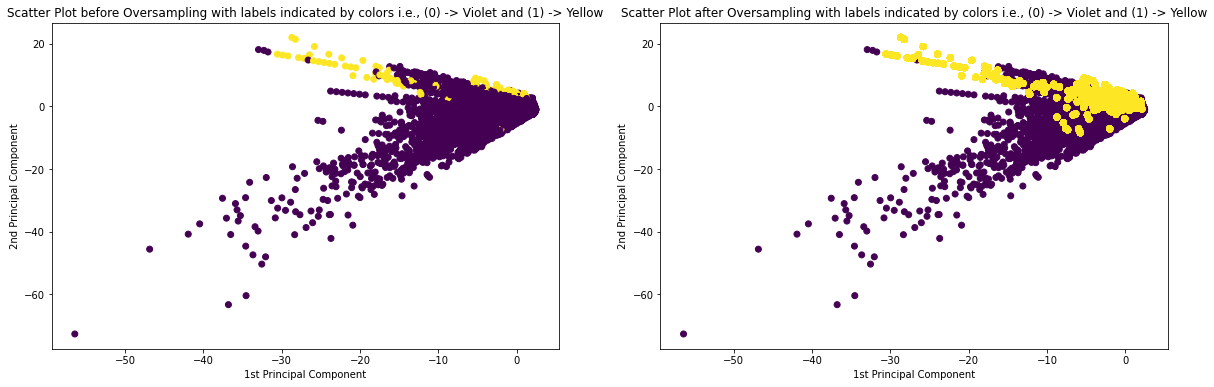

In [ ]:
#Lets compare scatter plots before Oversampling and after Oversampling

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot before Oversampling with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_resampled['V1'], X_resampled['V2'], c = y_resampled)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot after Oversampling with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

### Observations:

We can clearly notice that doing oversampling (whether it is Uniform or Random) would not make any difference to the scatter plot and the pattern is not more prominent. It does not add any new information to the data. It merely repeats it. Hence Oversampling technique is not beneficial.

Lets look at other Oversampling techniques namely SMOTE and ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)
X_ada, y_ada = ADASYN().fit_resample(X_train, y_train)

In [ ]:
#Lets look at the classes after balancing
print(sorted(Counter(y_smote).items()))
print(sorted(Counter(y_ada).items()))

[(0, 206402), (1, 206402)]
[(0, 206402), (1, 206408)]


In [ ]:
#Lets check the dataframe which has all the models built so far along with ROC-AUC Score
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98
1,Decision Tree,0.84
2,Random Forest,0.97
3,XGBoost,0.98


## Model Building
- Build different models on the balanced dataset and see the result

There is a catch here. It is not required to build all the models i.e. Logistic Regression, Decision Tree, Random Forest and XGBoost which we had already tried on imbalanced data. Based on the ROC-AUC Score that was already calculated earlier for imbalanced dataset, we can see the Logistic Regression scored the best. The same is also evident above when we look at the dataframe where the results are consolidated.

Hence lets choose Logistic Regression only to check the model performance on balanced dataset.

Reasoning:

A model that did not perform well on the imbalanced data, cannot perform the best on the balanced data. So taking this fact into account, lets choose the best classifier on the imbalanced data as the benchmark (which in our case is Logistic Regression) and use the same on balanced data.

Logistic Regression with SMOTE

In [ ]:
#perform hyperparameter tuning with cross validation

# Creating the hyperparameter grid
c_space = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]
params = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1200) #maximum iterations 1200 was chosen after trying out various values: 200,500,800,1000,1200

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

logreg_cv = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model X_smote, y_smote 
logreg_cv.fit(X_smote, y_smote)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1200), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3,
                               0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", logreg_cv.best_score_)
print("Best hyperparameters: ", logreg_cv.best_params_)

Best AUC:  0.9933109689760447
Best hyperparameters:  {'C': 5}


In [ ]:
#Evaluate on SMOTE data
# predict on SMOTE data
y_smote_pred = logreg_cv.predict(X_smote)

# create confusion matrix
cm = confusion_matrix(y_smote, y_smote_pred)
print(cm)

# check area under curve
y_smote_pred_prob = logreg_cv.predict_proba(X_smote)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_smote, y_smote_pred_prob),2))

[[203250   3152]
 [ 11353 195049]]
AUC:    	 0.99


In [ ]:
# predict on test data
y_pred = logreg_cv.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[67645  1143]
 [   15   113]]
AUC:    	 0.98


In [ ]:
#Lets store the above results
result = {"Model":["Logistic Regression with SMOTE"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98
1,Decision Tree,0.84
2,Random Forest,0.97
3,XGBoost,0.98
4,Logistic Regression with SMOTE,0.98


Logistic Regression with ADASYN

In [ ]:
#perform hyperparameter tuning with cross validation

# Creating the hyperparameter grid
c_space = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]
params = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=1200) #maximum iterations 1200 was chosen after trying out various values: 200,500,800,1000,1200

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

logreg_cv = GridSearchCV(estimator=logreg, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model X_smote, y_smote 
logreg_cv.fit(X_ada, y_ada)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1200), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3,
                               0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", logreg_cv.best_score_)
print("Best hyperparameters: ", logreg_cv.best_params_)

Best AUC:  0.9839937504239777
Best hyperparameters:  {'C': 5}


In [ ]:
#Evaluate on ADASYN data
# predict on ADASYN data
y_ada_pred = logreg_cv.predict(X_ada)

# create confusion matrix
cm = confusion_matrix(y_ada, y_ada_pred)
print(cm)

# check area under curve
y_ada_pred_prob = logreg_cv.predict_proba(X_ada)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_ada, y_ada_pred_prob),2))

[[198287   8115]
 [ 19097 187311]]
AUC:    	 0.98


In [ ]:
# predict on test data
y_pred = logreg_cv.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[65931  2857]
 [   10   118]]
AUC:    	 0.98


In [ ]:
#Lets store the above results
result = {"Model":["Logistic Regression with ADASYN"],"ROC-AUC Score":[round(roc_auc_score(y_test, y_pred_prob),2)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,ROC-AUC Score
0,Logistic Regression,0.98
1,Decision Tree,0.84
2,Random Forest,0.97
3,XGBoost,0.98
4,Logistic Regression with SMOTE,0.98
5,Logistic Regression with ADASYN,0.98


## **Conclusion:**

1. The results are consolidated as above. The first 4 models namely, Logistic Regression, Decision Tree, Random Forest and XGBoost were tested on raw data (imbalanced dataset). Logistic Regression and XGBoost gave the best results with ROC-AUC Score 0.98 on the test data.

2. We preferred to choose Logistic Regression over XGBoost due to amount of time taken for the model run. Logistic Regression could complete within 25 minutes, whereas XGBoost took around 2 hours to complete.

3. Two Oversampling techniques namely, SMOTE and ADASYN were used to balance the dataset.

4. As indicated in the notebook, only Logistic Regression was used to test the model performance on balanced dataset, since we got the best ROC-AUC Score of 0.98 on the imbalanced dataset.

    Reasoning:

  A model that did not perform well on the imbalanced data, cannot perform the best on the balanced data. So taking this fact into account, lets choose the best classifier on the imbalanced data as the benchmark (which in our case is Logistic Regression) and use the same on balanced data.

5. Logistic Regression model was run for both cases - SMOTE and ADASYN, with ROC-AUC Score of 0.98 on the test data. Hence balancing dataset has helped to build better classifiers. The score did not go below 0.98. We can make a claim that balancing the dataset helps build better classifiers in this Credit Card Fraud Detection as a Classification Problem.

6. Printing the results of hyperparameters below for both Imbalanced and Balanced datasets.
  - Imbalanced data:

    1. Logistic Regression:

        Best AUC:  0.9820507565022183
    
        Best hyperparameters:  {'C': 0.001}

    2. Decision Tree:

        Best AUC:  0.7768115942028986

        Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

    3. Random Forest:

        Best AUC:  0.9672509837838609

        Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100}

    4. XGBoost:

        Best AUC:  0.9844224941823227

        Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
        
   - Balanced data:

     1. Logistic Regression with SMOTE:

        Best AUC:  0.9933109689760447

        Best hyperparameters:  {'C': 5}

     2. Logistic Regression with ADASYN:

        Best AUC:  0.9839937504239777

        Best hyperparameters:  {'C': 5}